In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import Polynomial
import os

#Define variables
file = os.path.join(os.getcwd(), "data.csv")
df = pd.read_csv(file)
mass = (55 * 30 * 15.0)/1000


#columns
df.columns = df.columns.str.strip()
frame = df.groupby(["Energy (MeV)", "Depth (cm)", "SSD (cm)"])["Energy Absorbed (MeV)"].mean().reset_index()


# Energy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


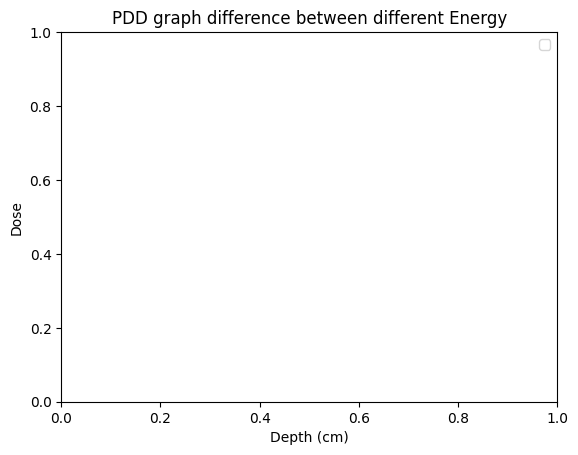

In [11]:
Absorbed = []
Depth = []
Energy =[]
for energy in df["Energy (MeV)"].unique():
    Energy.append(energy)
    frame1 = frame[frame["SSD (cm)"] == 100]
    subset = frame1[frame1["Energy (MeV)"] == energy]
    Absorbed.append(subset["Energy Absorbed (MeV)"].to_list())
    Depth.append(subset["Depth (cm)"].to_list())

for i in range(len(Absorbed)):
    dose = np.array(Absorbed[i])
    dose = dose * 1.6*10**(-13)
    dose = dose / mass
    
    plt.scatter(Depth[i], dose, label = f"{Energy[i]}MeV")

plt.xlabel("Depth (cm)")
plt.ylabel("Dose")
plt.title("PDD graph difference between different Energy")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


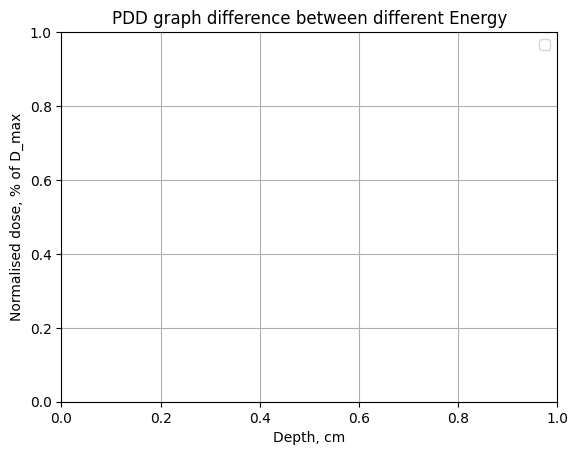

In [12]:
for n in range(len(Absorbed)):
    dose = np.array(Absorbed[n])
    depth = np.array(Depth[n])
    
    coef = Polynomial.fit(depth, dose, deg=4).convert().coef
    
    x_fit = np.linspace(depth.min(), depth.max(), 200)
    y_fit = sum(c * x_fit**i for i,c in enumerate(coef))
    d_max = y_fit.max()
    y_fit = y_fit / d_max * 100
    plt.plot(x_fit, y_fit, label = f"{Energy[n]} MeV")
    

plt.xlabel("Depth, cm")
plt.ylabel("Normalised dose, % of D_max")
plt.title("PDD graph difference between different Energy")
plt.grid(True)
plt.legend()
plt.show()

## SSD

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


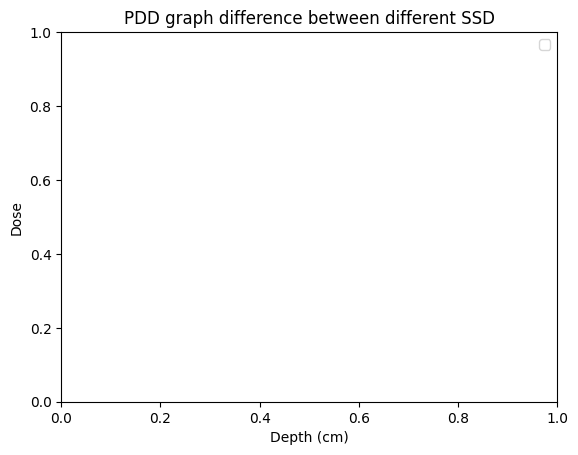

In [13]:
Absorbed_2 = []
Depth_2 = []
Ssd = []

for ssd in frame["SSD (cm)"].unique():
    Ssd.append(ssd)
    frame6 = frame[frame["Energy (MeV)"] == 15]
    subset = frame6[frame6["SSD (cm)"] == ssd]
    Absorbed_2.append(subset["Energy Absorbed (MeV)"].to_list())
    Depth_2.append(subset["Depth (cm)"].to_list())

for i in range(len(Absorbed_2)):
    dose = np.array(Absorbed_2[i])
    #dose = dose * 1.6*10**(-13)
    #dose = dose/mass
    
    plt.scatter(Depth_2[i], dose, label = f"{Ssd[i]}cm")
    
plt.xlabel("Depth (cm)")
plt.ylabel("Dose")
plt.title("PDD graph difference between different SSD")
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


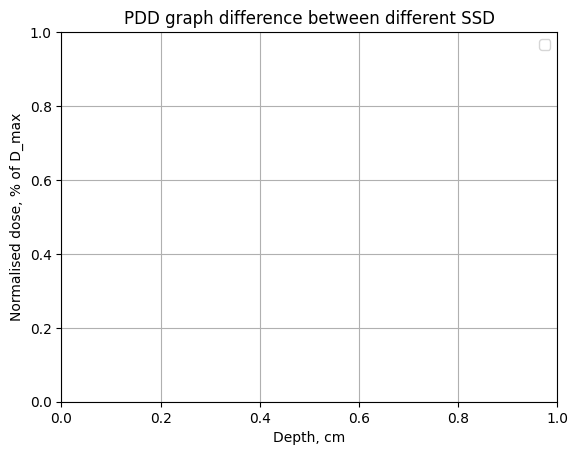

In [14]:
for n in range(len(Absorbed_2)):
    dose = np.array(Absorbed_2[n])
    depth = np.array(Depth_2[n])
    
    coef = Polynomial.fit(depth, dose, deg=4).convert().coef
    
    x_fit = np.linspace(depth.min(), depth.max(), 200)
    y_fit = sum(c * x_fit**i for i,c in enumerate(coef))
    d_max = y_fit.max()
    y_fit = y_fit / d_max * 100
    plt.plot(x_fit, y_fit, label = f"{Ssd[n]} cm")
    

plt.xlabel("Depth, cm")
plt.ylabel("Normalised dose, % of D_max")
plt.title("PDD graph difference between different SSD")
plt.grid(True)
plt.legend()
plt.show()